# Основы статистики

In [143]:
import statistics
import random

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [144]:
general_totality = list(range(1, 100))
general_selection = [n for n in general_totality if 40 >= n <= 60]

print(general_totality)
print(general_selection)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


## Меры центральной тенденции

### Мода (mode)

Значение изменяемого признака, которое встречается максимально часто.

In [145]:
data = [1, 1, 1, 5, 5, 5, 2, 3, 4, 4]

print(statistics.mode(data))
print(statistics.multimode(data))

1
[1, 5]


### Медиана (median)

Значение признака, которое делит упорядоченное множество данных пополам.

In [146]:
data = [1, 1, 1, 5, 5, 5, 2, 3, 4, 4]

print(statistics.median(data))
print(statistics.median_low(data))
print(statistics.median_high(data))

3.5
3
4


### Среднее значение (mean)

Сумма всех значений измеренного признака, делённая на количество измеренных значений.

__Свойства среднего:__

$$
M_{x+c} = M_x + c \\
M_{x*c} = M_x * c \\
\sum(x_i - M_x) = 0
$$

Обозначения:

$ M $ - для генеральной совокупности
$ \overline{x} $ - для выборки

In [147]:
data = [1, 2, 3, 4, 5]

print(statistics.mean(data))

3


## Меры изменчивости

### Размах (range)

Разность максимального и минимального значения

$$ R = X_{max} - X_{min} $$

In [148]:
def statistics_range(ns):
    return max(ns) - min(ns)


print(statistics_range([1, 2, 3, 4, 5]))

4


## Дисперсия (variance)

Средний квадрат отклонений индивидуальных значений признака от их средней величины.

Для генеральной совокупности:

$$ D = \frac{\sum(x_i - \overline{x})^2}{n} $$

Для выборки:

$$ D = \frac{\sum(x_i - \overline{x})^2}{n-1} $$

Данный показатель превышает реальные средние отклонения от среднего по выборке.

__Среднеквадратическое отклонение:__

$$ \sqrt{D} = \sigma $$

Показывает реальное среднее значение отклонений от среднего значения по выборке.

Обозначения:
$ \sigma $ - для генеральной совокупности
$ sd $ - для выборки (standard deviation)

__Свойства дисперсии:__

$$
D_{x+c}=D_x \\
sd_{x+c}=sd_x \\
$$

$$
D_{x*c}=D_x*c^2 \\
sd_{x*c}=sd_x*c
$$


In [149]:
print(statistics.variance(general_totality))
print(statistics.variance(general_selection))

825
136.66666666666666


## Квантили распределения

Квартили - три точки (значения признака), которые делят упорядоченное множество данных на четыре равные части.

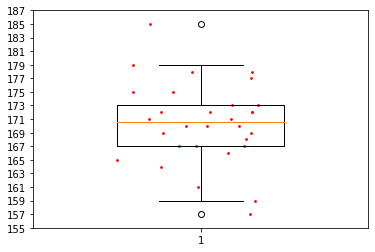

In [150]:
data = [157, 159, 161, 164, 165, 166, 167, 167, 167, 168, 169, 169, 170, 170, 170, 171, 171, 172, 172, 172, 172, 173,
        173, 175, 175, 177, 178, 178, 179, 185]

random.seed(6)
xs = [0.5 + random.random() for x in data]

fig, ax = plt.subplots()
ax.boxplot(data, positions=[1], widths=1)
ax.scatter(xs, data, s=3, c="red")

ax.set(xlim=(0, 2), xticks=range(1, 2),
       ylim=(155, 187), yticks=range(155, 188, 2))

plt.show()

## Стандартизация

Стандартизация или z-преобразование - преобразование полученных данных в стандартную Z-шкалу (Z-scores) со средним $ M_z=0 $ и $ D_z=1 $

$$
Z_i = \frac{x_i-\overline{x}}{\sigma_x}
$$

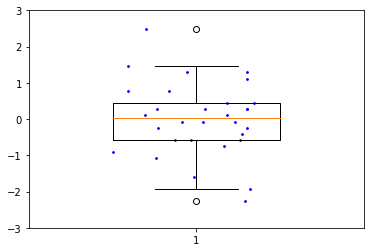

[-2.27020839 -1.93137132 -1.59253425 -1.08427864 -0.9148601  -0.74544156
 -0.57602303 -0.57602303 -0.57602303 -0.40660449 -0.23718595 -0.23718595
 -0.06776741 -0.06776741 -0.06776741  0.10165112  0.10165112  0.27106966
  0.27106966  0.27106966  0.27106966  0.4404882   0.4404882   0.77932527
  0.77932527  1.11816234  1.28758088  1.28758088  1.45699942  2.47351064]


In [161]:
data = [157, 159, 161, 164, 165, 166, 167, 167, 167, 168, 169, 169, 170, 170, 170, 171, 171, 172, 172, 172, 172, 173,
        173, 175, 175, 177, 178, 178, 179, 185]

z_data = stats.zscore(data)

random.seed(6)
xs = [0.5 + random.random() for x in data]

fig, ax = plt.subplots()
ax.boxplot(z_data, positions=[1], widths=1)
ax.scatter(xs, z_data, s=3, c="blue")

ax.set(xlim=(0, 2), xticks=range(1, 2),
       ylim=(-3, 3), yticks=range(-3, 4, 1))

plt.show()

print(stats.zscore(data))